# Data Analysis and Mining - PCA

## Objectives 
- Perform Principal Component Analysis.
- Perform Single Value Decomposition.

## Initialization

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline
sns.set_style("darkgrid")

### Load data

Start by loading the entire dataset.

In [3]:
# Specify the path to the dataset CSV file
dataset_path = "../../Dataset/dataset.csv"

# Read the dataset into a pandas DataFrame
df = pd.read_csv(dataset_path)

df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


### Data cleaning

Then, we drop columns that we do not need. In addition, we add one more column which represents the percentage of win games, as it is one of the most interesting features.

In [4]:
# Drop columns 'TEAM', 'CONF', 'SEED'
df = df.drop(['TEAM', 'CONF', 'SEED'], axis=1)

Check the size of the dataset.

In [5]:
df.shape

(1757, 21)

We decided to analyze a subset of the whole dataset. Since our dataset is a collection of data which belongs to 5 different seasons, we filter the dataset by only keeping and analyzing the information related to one year.

In [6]:
# Filter by year, keep only data from selected year
df = df[df['YEAR'] == 2015].drop('YEAR', axis=1)

Check the size of the dataset.

In [7]:
df.shape

(351, 20)

### Classification

Label the teams depending on their ranking at the end of the season.

In [8]:
# Save column 'POSTSEASON' for later
df_colors = df[['POSTSEASON']]

# Colour list for the plot depending on df_colors
c=[]
for i in range(len(df_colors)):
    
    if df_colors.iloc[i][0] == 'R64':
        c.append('red')
    elif df_colors.iloc[i][0] == 'R32':
        c.append('red')
    elif df_colors.iloc[i][0] == 'S16':
        c.append('red')
    elif df_colors.iloc[i][0] == 'E8':
        c.append('blue')
    elif df_colors.iloc[i][0] == 'F4':
        c.append('blue')
    elif df_colors.iloc[i][0] == '2ND':
        c.append('blue')
    elif df_colors.iloc[i][0] == 'Champions':
        c.append('blue')

    else:
        c.append('green')

### Choice of the features

Including both offensive and defensive metrics ensures a balanced representation of team performance. ADJOE (expected score out of 100 actions) and ADJDE (opponents' expected score out of 100 actions) capture overall team efficiency, and adding both of them will let us understand if defending is more important than attacking, or viceversa.

At the same time, we decided to take into consideration 2P_O and 3P_O, in order to find out about the importance of 3-points goals compared to 2-points goals, and viceversa.

And, finally, in addition to 2P_O and 3P_O, we added 2P_D and 3P_D, for the same reason which was mentioned about the choice made for ADJOE and ADJDE.

Overall, our choice should comprehend easily-interpretable features which are expected to provide interesting insides about the importance of attacking and defending.

In [9]:
# Take from df the columns 'ADJOE', 'ADJDE', '2P_O', '2P_D', '3P_O' and '3P_D'
df = df[['ADJOE', 'ADJDE', '2P_O', '2P_D', '3P_O', '3P_D']]

df.head()

,ADJOE,ADJDE,2P_O,2P_D,3P_O,3P_D
1,129.1,93.6,54.8,44.7,36.5,37.5
5,125.2,90.6,55.9,46.3,38.7,31.4
10,109.4,87.4,48.4,43.3,30.7,30.3
11,125.3,98.6,58.2,47.4,39.0,32.6
23,117.5,86.9,53.3,42.7,36.0,33.5


And let's center it now.

In [10]:
# To do PCA, normalize data getting df1 by standard deviation and df2 by min-max
df1 = (df - df.mean()) / df.std()
df2 = (df - df.mean()) / (df.max() - df.min())

df1.head(), df2.head()

(       ADJOE     ADJDE      2P_O      2P_D      3P_O      3P_D
 1   3.618807 -1.332584  2.151067 -0.994934  0.782616  1.248031
 5   3.091887 -1.791479  2.485849 -0.500154  1.520151 -1.209805
 10  0.957186 -2.280968  0.203245 -1.427866 -1.161794 -1.653021
 11  3.105398 -0.567758  3.185848 -0.159993  1.620724 -0.726296
 23  2.051558 -2.357451  1.694546 -1.613409  0.614994 -0.363665,
        ADJOE     ADJDE      2P_O      2P_D      3P_O      3P_D
 1   0.511157 -0.241991  0.356960 -0.171137  0.123517  0.234654
 5   0.436729 -0.325324  0.412515 -0.086031  0.239919 -0.227467
 10  0.135203 -0.414213  0.033728 -0.245605 -0.183361 -0.310800
 11  0.438638 -0.103102  0.528677 -0.027520  0.255792 -0.136558
 23  0.289783 -0.428102  0.281202 -0.277520  0.097062 -0.068376)

Plot the centered data over ADJOE and ADJDE.

Text(0.5, 1.0, 'ADJOE vs ADJDE for Range-Norm')

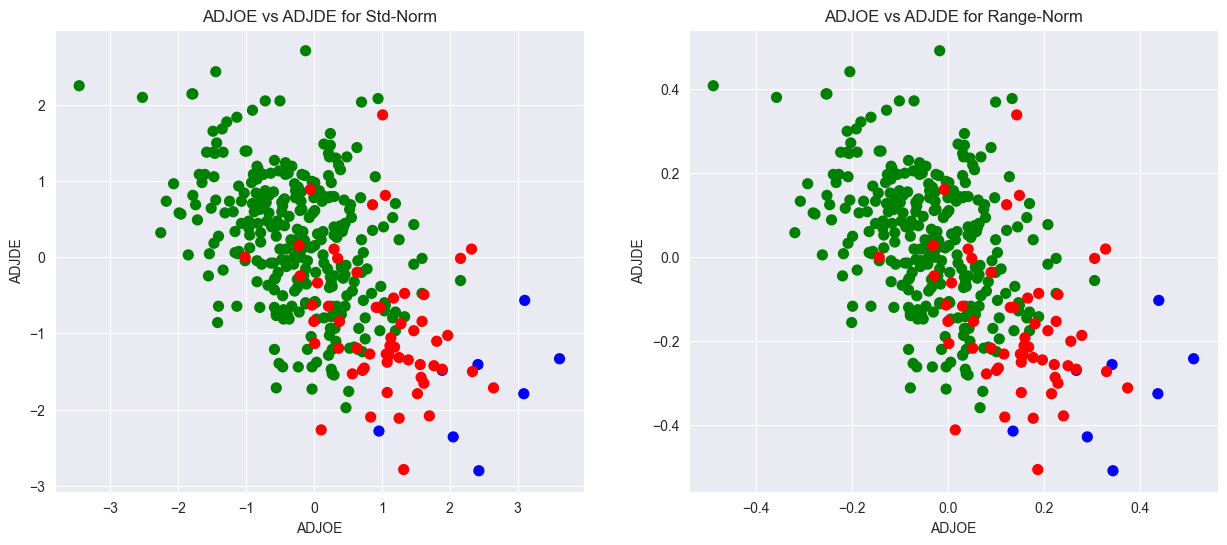

In [11]:
# Make df a numpy array
data1 = df1.values
data2 = df2.values

# Two scatter subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot data1
ax[0].scatter(data1[:, 0], data1[:, 1], c=c, s=50)
ax[0].set_xlabel('ADJOE')
ax[0].set_ylabel('ADJDE')
ax[0].set_title('ADJOE vs ADJDE for Std-Norm')

# Plot data2
ax[1].scatter(data2[:, 0], data2[:, 1], c=c, s=50)
ax[1].set_xlabel('ADJOE')
ax[1].set_ylabel('ADJDE')
ax[1].set_title('ADJOE vs ADJDE for Range-Norm')


## Analysis with PCA

### Principal Component Analysis

Look for the eigenvalues of the covariance matrix.

[0.47 0.74 0.85 0.93 0.98]
[0.47 0.73 0.85 0.93 0.98]


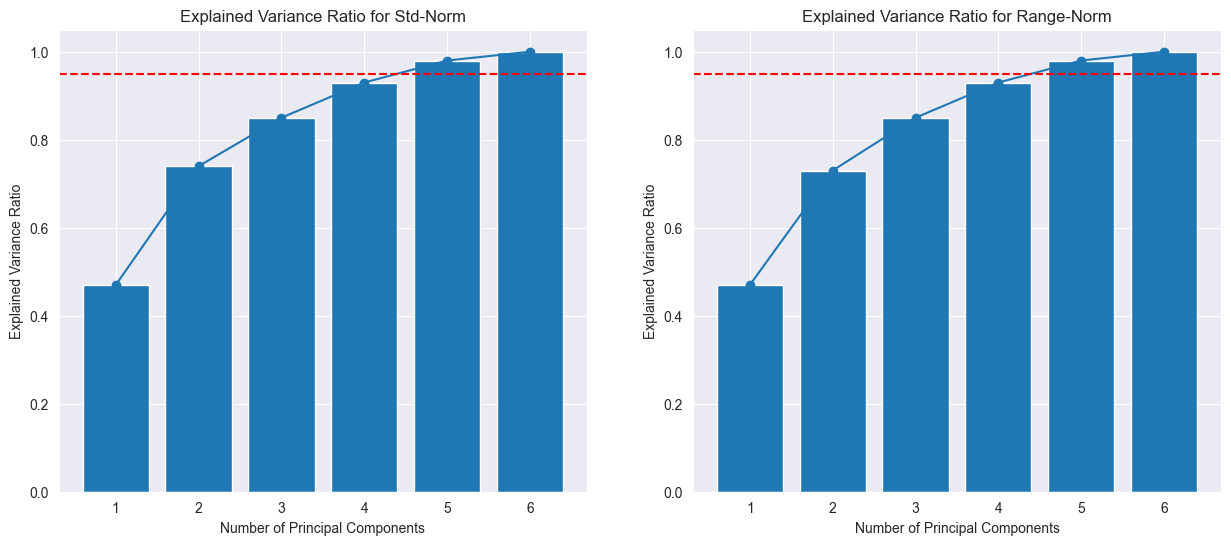

In [12]:
# Compute the covariance matrix from df
covmatrix1 = df1.cov()
covmatrix2 = df2.cov()

# Obtain the eigenvalues and eigenvectors from the covariance matrix
eigenvalues1, eigenvectors1 = np.linalg.eig(covmatrix1)
eigenvalues2, eigenvectors2 = np.linalg.eig(covmatrix2)

# Sort the eigenvalues in descending order
idxs1 = eigenvalues1.argsort()[::-1]
idxs2 = eigenvalues2.argsort()[::-1]
eigenvalues1 = eigenvalues1[idxs1]
eigenvalues2 = eigenvalues2[idxs2]
eigenvectors1 = eigenvectors1[:,idxs1]
eigenvectors2 = eigenvectors2[:,idxs2]

# Compute the cumulative explained variance ratio
cumulative_explained_variance_ratio1 = np.cumsum(np.round(eigenvalues1/eigenvalues1.sum(), 2))
cumulative_explained_variance_ratio2 = np.cumsum(np.round(eigenvalues2/eigenvalues2.sum(), 2))
print(cumulative_explained_variance_ratio1[:-1])
print(cumulative_explained_variance_ratio2[:-1])

# Two subplots of explained variance ratio
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot explained variance ratio for data1
ax[0].bar(range(1, len(cumulative_explained_variance_ratio1) + 1), cumulative_explained_variance_ratio1)
ax[0].plot(range(1, len(cumulative_explained_variance_ratio1) + 1), cumulative_explained_variance_ratio1, marker='o')
ax[0].set_xlabel('Number of Principal Components')
ax[0].set_ylabel('Explained Variance Ratio')
ax[0].set_title('Explained Variance Ratio for Std-Norm')
# Add line
ax[0].axhline(y=0.95, color='r', linestyle='--')

# Plot explained variance ratio for data2
ax[1].bar(range(1, len(cumulative_explained_variance_ratio2) + 1), cumulative_explained_variance_ratio2)
ax[1].plot(range(1, len(cumulative_explained_variance_ratio2) + 1), cumulative_explained_variance_ratio2, marker='o')
ax[1].set_xlabel('Number of Principal Components')
ax[1].set_ylabel('Explained Variance Ratio')
ax[1].set_title('Explained Variance Ratio for Range-Norm')
# Add line
ax[1].axhline(y=0.95, color='r', linestyle='--')

Use the covariance matrix of the normalized data to obtain the principal components.

(0.0, 1.0, 0.0, 1.0)

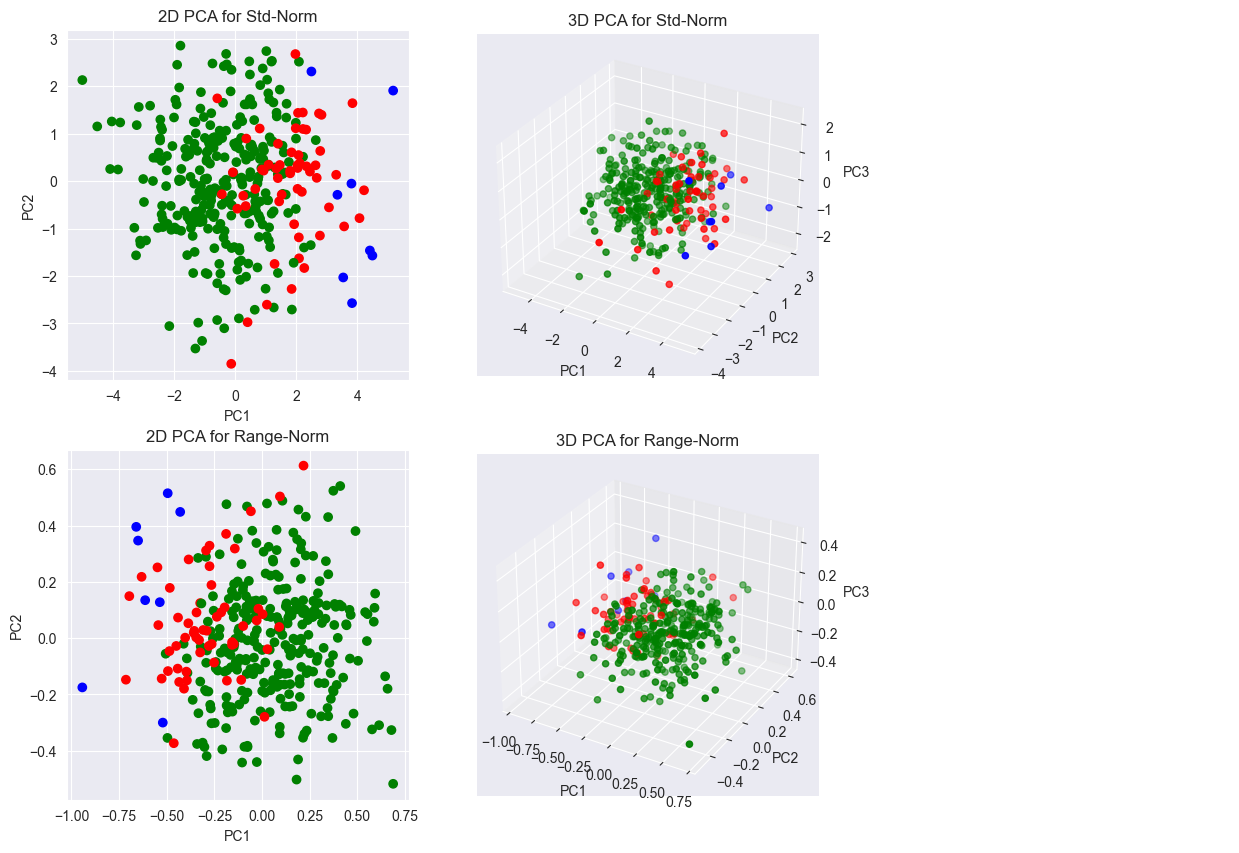

In [13]:
# Obtain principal components (data in the new space)
pc1 = np.dot(df1, eigenvectors1)
pc2 = np.dot(df2, eigenvectors2)

# Build the names to be plotted
names1 = ["PC_"+str(x+1) for x in range(pc1.shape[1])]
names2 = ["PC_"+str(x+1) for x in range(pc2.shape[1])]

# Plot the data in 2D and 3D
fig = plt.figure(figsize=(15, 10))  # Adjust the figure width as needed

# 2D plot
ax1 = fig.add_subplot(231)
ax1.scatter(pc1[:, 0], pc1[:, 1], c=c)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('2D PCA for Std-Norm')

# 3D plot
ax3 = fig.add_subplot(232, projection='3d')
ax3.scatter(pc1[:, 0], pc1[:, 1], pc1[:,2], c=c)
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.set_zlabel('PC3')
ax3.set_title('3D PCA for Std-Norm')

# Add empty subplot
fig.add_subplot(233, frameon=False)
# Turn off axis
plt.axis('off')

# 2D plot
ax1 = fig.add_subplot(234)
ax1.scatter(pc2[:, 0], pc2[:, 1], c=c)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('2D PCA for Range-Norm')

# 3D plot
ax3 = fig.add_subplot(235, projection='3d')
ax3.scatter(pc2[:, 0], pc2[:, 1], pc2[:,2], c=c)
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.set_zlabel('PC3')
ax3.set_title('3D PCA for Range-Norm')

# Add empty subplot
fig.add_subplot(233, frameon=False)
# Turn off axis
plt.axis('off')


Plot indeces to look for "Upsets".

(-5.519473543808844, 5.683048476366457, -4.186768398101327, 3.1898927383482296)

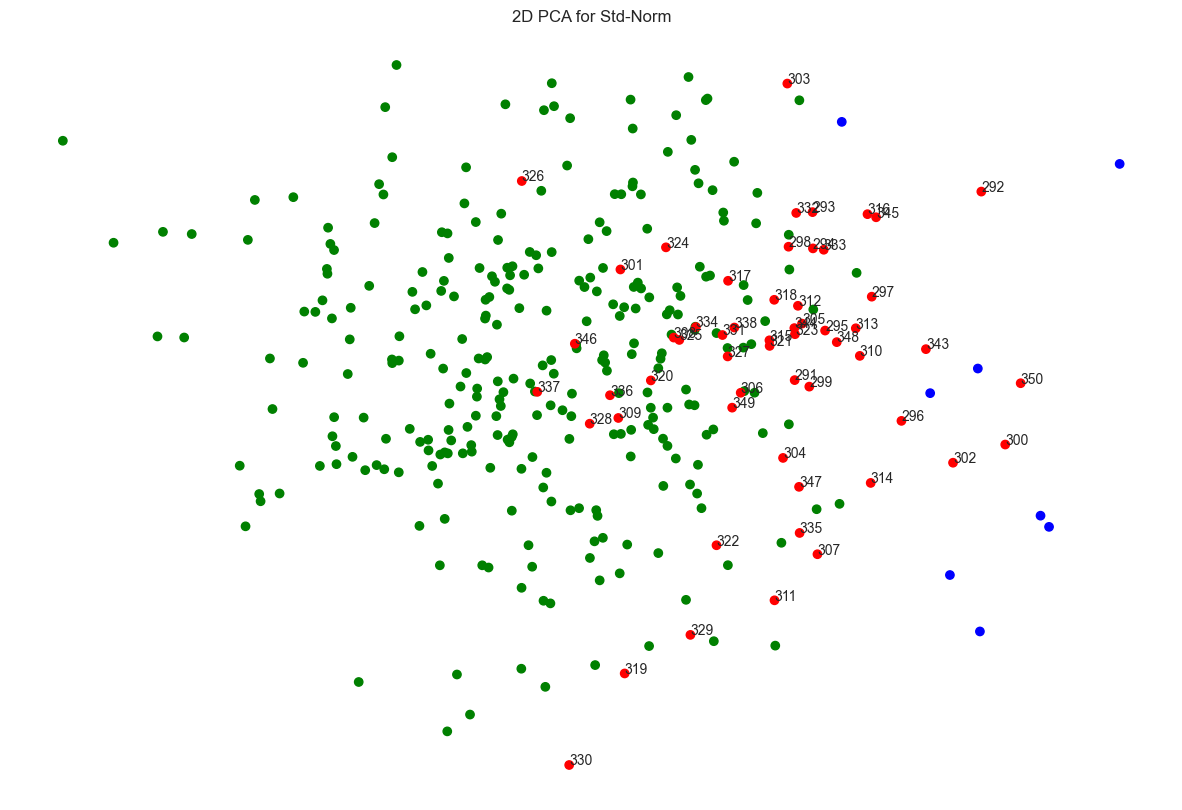

In [14]:
# Plot the data in 2D and 3D
fig = plt.figure(figsize=(15, 10))  # Adjust the figure width as needed

# 2D plot
ax1 = fig.add_subplot(111)
ax1.scatter(pc1[:, 0], pc1[:, 1], c=c)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('2D PCA for Std-Norm')

# For the red points, plot the index in the dataset
for i in range(len(c)):
    if c[i] == 'red':
        ax1.text(pc1[i, 0], pc1[i, 1], str(i))

plt.axis('off')

And get their names.

In [15]:
df2 = pd.read_csv(dataset_path)

# Filter year = 2015
df2 = df2[df2['YEAR'] == 2015]

# Print team column of following indexes
df2.iloc[[301, 303, 324, 326, 328, 336, 337, 346]]['TEAM']

1507                 UAB
1518       San Diego St.
1625             Harvard
1636             Hampton
1645       Robert Morris
1683    North Dakota St.
1688      Texas Southern
1736       West Virginia
Name: TEAM, dtype: object

### Features and Principal Components

Text(0.5, 1.0, 'PC6')

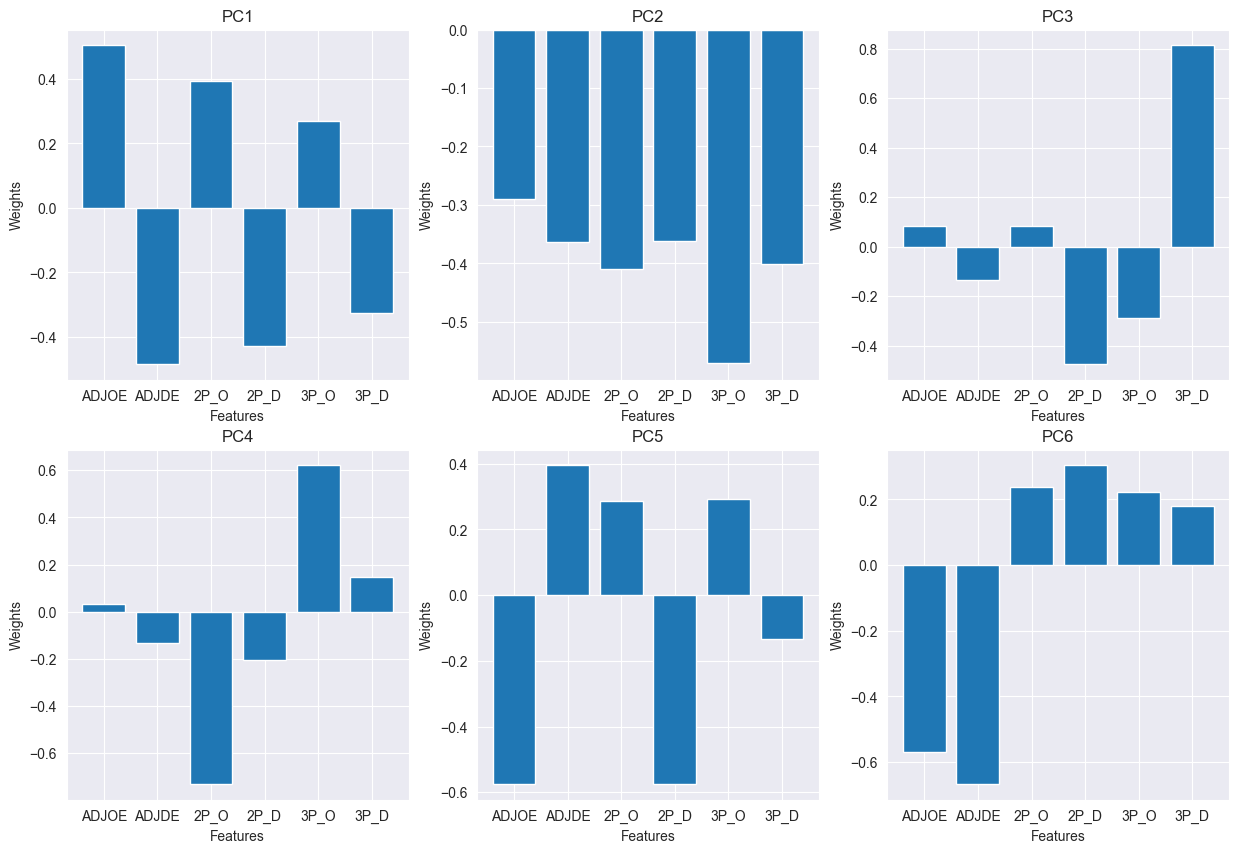

In [16]:
# Plot how the principal components are built as a function of the original features
fig = plt.figure(figsize=(15, 10))  # Adjust the figure width as needed

# Names of the features
f_names = ['ADJOE', 'ADJDE', '2P_O', '2P_D', '3P_O', '3P_D']

# Plot the eigenvectors
ax = fig.add_subplot(231)
ax.bar(f_names, eigenvectors1[:, 0])
ax.set_xlabel('Features')
ax.set_ylabel('Weights')
ax.set_title('PC1')

ax = fig.add_subplot(232)
ax.bar(f_names, eigenvectors1[:, 1])
ax.set_xlabel('Features')
ax.set_ylabel('Weights')
ax.set_title('PC2')

ax = fig.add_subplot(233)
ax.bar(f_names, eigenvectors1[:, 2])
ax.set_xlabel('Features')
ax.set_ylabel('Weights')
ax.set_title('PC3')

ax = fig.add_subplot(234)
ax.bar(f_names, eigenvectors1[:, 3])
ax.set_xlabel('Features')
ax.set_ylabel('Weights')
ax.set_title('PC4')

ax = fig.add_subplot(235)
ax.bar(f_names, eigenvectors1[:, 4])
ax.set_xlabel('Features')
ax.set_ylabel('Weights')
ax.set_title('PC5')

ax = fig.add_subplot(236)
ax.bar(f_names, eigenvectors1[:, 5])
ax.set_xlabel('Features')
ax.set_ylabel('Weights')
ax.set_title('PC6')

## Analysis with SVD


### Compute Singular Value Decomposition (SVD)

Let us compute the truncated version to save space.

In [17]:
u, s, vh = np.linalg.svd(data1, full_matrices=False)

u.shape, s.shape, vh.shape

((351, 6), (6,), (6, 6))

Now that we have the eigenvectors of $X^\intercal X$ let's plot their directions over the data.

Text(0.5, 1.0, 'Data')

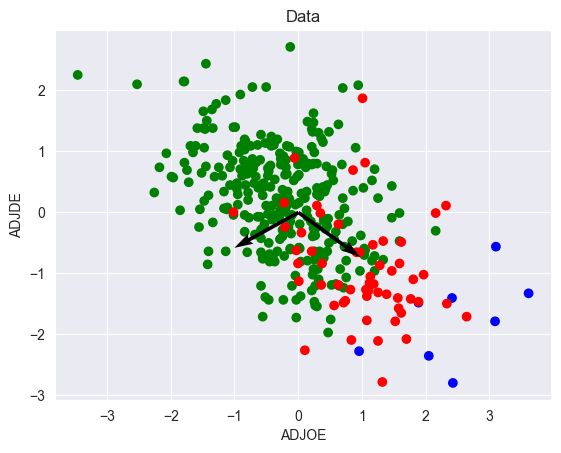

In [19]:
# Scatter plot of data with small points
plt.scatter(data1[:, 0], data1[:, 1], c=c)

# Draw the Unit EigenVectors
plt.quiver(0, 0, vh[0,0], vh[1,0], scale_units='xy', angles='xy', scale=0.5)
plt.quiver(0, 0, vh[0,1], vh[1,1], scale_units='xy', angles='xy', scale=0.5)

# Set names of the axes and of the plot
plt.xlabel('ADJOE')
plt.ylabel('ADJDE')
plt.title('Data')

Notice that...

In [20]:
# Print eigenvectors of covariance matrix and rows of vh
print("Eigenvectors of covariance matrix:")
print(eigenvectors1)
print("\nVh transposed:")
print(vh.T)

Eigenvectors of covariance matrix:
[[ 0.5031554  -0.28940409  0.08441644  0.03057218 -0.57405882 -0.57050469]
 [-0.48264993 -0.36318702 -0.13463217 -0.1340161   0.39475497 -0.66575266]
 [ 0.39264222 -0.40938496  0.08160756 -0.72976728  0.28630595  0.23884067]
 [-0.42659745 -0.36131618 -0.47333687 -0.20558966 -0.5737265   0.30329564]
 [ 0.26882619 -0.57036376 -0.28768896  0.62007961  0.2923184   0.22294384]
 [-0.32475047 -0.40109877  0.81318849  0.14757679 -0.13431958  0.18044591]]

Vh transposed:
[[-0.5031554  -0.28940409  0.08441644  0.03057218  0.57405882  0.57050469]
 [ 0.48264993 -0.36318702 -0.13463217 -0.1340161  -0.39475497  0.66575266]
 [-0.39264222 -0.40938496  0.08160756 -0.72976728 -0.28630595 -0.23884067]
 [ 0.42659745 -0.36131618 -0.47333687 -0.20558966  0.5737265  -0.30329564]
 [-0.26882619 -0.57036376 -0.28768896  0.62007961 -0.2923184  -0.22294384]
 [ 0.32475047 -0.40109877  0.81318849  0.14757679  0.13431958 -0.18044591]]


In [21]:
# Change sign of columns 1 and 4 of vh.T
vh.T[:, 1] = -vh.T[:, 1]
vh.T[:, 4] = -vh.T[:, 4]

# Check eigenvectors and vh.T are the same
if np.allclose(eigenvectors1, vh.T):
    print("They are the same!")

# Reset the columns
vh.T[:, 1] = -vh.T[:, 1]
vh.T[:, 4] = -vh.T[:, 4]

Multiplying data by $V$ means projecting each point on each of the eigenvectors of the covariance matrix. 

Since $X = U S V^\intercal$, multiplying by $V$ yields 
$$XV= U S V^\intercal V= U S.$$
which columns are uncorrelated with one another, evidently. 

In [22]:
project_data_1 = np.dot(data1, vh.T)
project_data_2 = np.dot(u, np.diag(s))

# Compare if they are the same with np.allclose
if np.allclose(project_data_1, project_data_2):
    print("Math seems to work :)")

Math seems to work :)


And now let's plot the new data.

(0.0, 1.0, 0.0, 1.0)

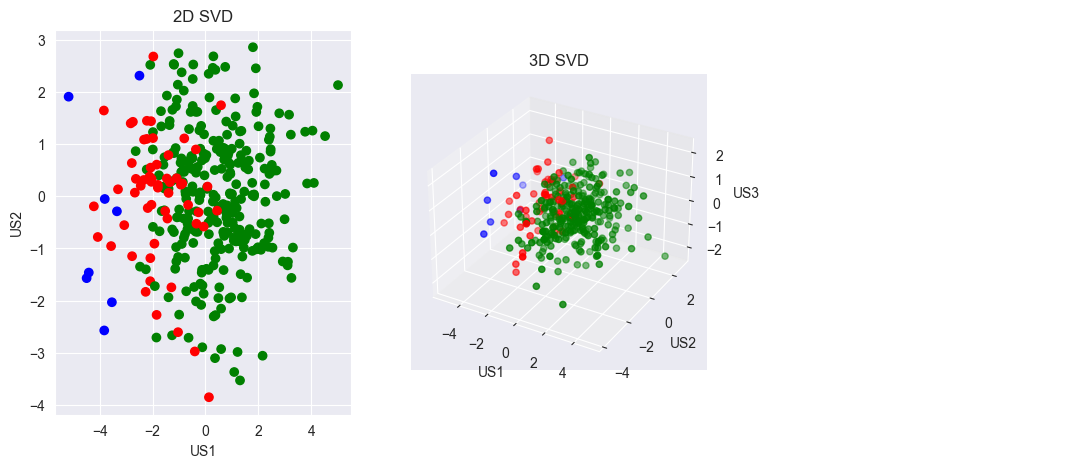

In [23]:
## Calculate the coordinates of the data points in the projection axes of the space spanned 
## by the leading eigenvectors contained in $U$ 
us1 = u[:,0] * s[0] 
us2 = u[:,1] * s[1]
us3 = u[:,2] * s[2]

# Plot the data in 2D and 3D
fig = plt.figure(figsize=(13, 5))  # Adjust the figure width as needed

# 2D plot
ax1 = fig.add_subplot(131)
ax1.scatter(us1, us2, c=c)
ax1.set_xlabel('US1')
ax1.set_ylabel('US2')
ax1.set_title('2D SVD')

# 3D plot
ax3 = fig.add_subplot(132, projection='3d')
ax3.scatter(us1, us2, us3, c=c)
ax3.set_xlabel('US1')
ax3.set_ylabel('US2')
ax3.set_zlabel('US3')
ax3.set_title('3D SVD')

# Empty subplot to let the third label to fit
ax2 = fig.add_subplot(133, aspect='equal')
ax2.axis('off')

### New features

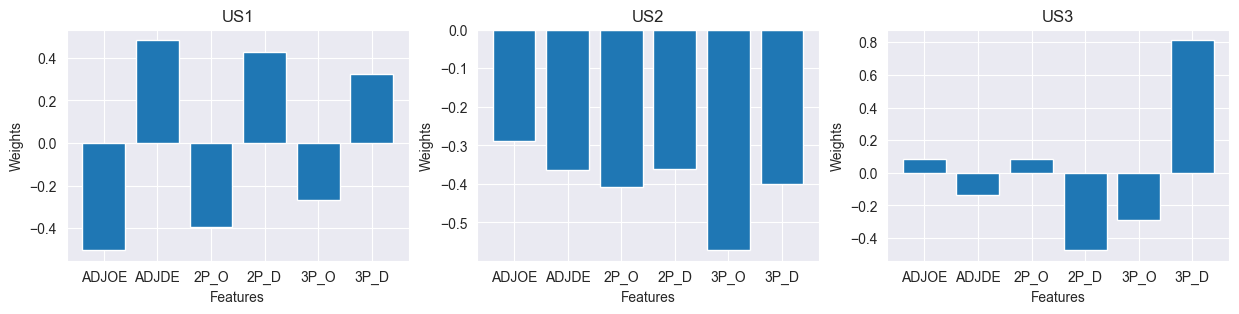

In [24]:
# Plot how the principal components are built as a function of the original features
fig = plt.figure(figsize=(15, 3))  # Adjust the figure width as needed

# Names of the features
f_names = ['ADJOE', 'ADJDE', '2P_O', '2P_D', '3P_O', '3P_D']

# Plot the eigenvectors
ax1 = fig.add_subplot(131)
ax1.bar(f_names, vh.T[:, 0])
ax1.set_xlabel('Features')
ax1.set_ylabel('Weights')
ax1.set_title('US1')

ax2 = fig.add_subplot(132)
ax2.bar(f_names, vh.T[:, 1])
ax2.set_xlabel('Features')
ax2.set_ylabel('Weights')
ax2.set_title('US2')

ax2 = fig.add_subplot(133)
ax2.bar(f_names, vh.T[:, 2])
ax2.set_xlabel('Features')
ax2.set_ylabel('Weights')
ax2.set_title('US3')

plt.show()


Try to interpret the matrices of SVD.

In [28]:
# Filter dataset with only best teams
df_blue = df[df_colors['POSTSEASON'].isin(['E8', 'F4', '2ND', 'Champions'])]

# Do svd on the df_blue
u, s, vh = np.linalg.svd(df_blue, full_matrices=False)

# Print first two columns of u, s and v
s[:]

array([489.77310826,  10.34819406,   7.04563958,   5.63547555,
         3.81840624,   3.14284165])

In [35]:
# Print first column of U
u[:, 0]

array([-0.37166022, -0.36306612, -0.32698824, -0.37439473, -0.34427705,
       -0.35829415, -0.34799157, -0.33905668])